# Work, Men, Women

Data sources:

1. https://stats.oecd.org/index.aspx?queryid=54757
2. https://stats.oecd.org/Index.aspx?DatasetCode=AVE_HRS

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [4]:
%%bash
ls datasets/work

GENDER_EMP_12112018223032946.csv
men_working_time_AVE_HRS_12112018221342527.csv
women_working_time_AVE_HRS_12112018221357215.csv


In [5]:
working_time_df = pd.read_csv( 'datasets/work/men_working_time_AVE_HRS_12112018221342527.csv' )
gender_working_df = pd.read_csv('datasets/work/GENDER_EMP_12112018223032946.csv')

In [6]:
men_df = working_time_df[ working_time_df['Sex'] == 'Men' ]
women_df = working_time_df[ working_time_df['Sex'] == 'Women' ]
both_df = working_time_df[ working_time_df['Sex'] == 'All persons' ]

In [136]:
men_time = men_df[ ['Time', 'Value'] ].groupby('Time').mean()
women_time = women_df[ ['Time', 'Value'] ].groupby('Time').mean()

In [137]:
men_gender_working_df = gender_working_df[ gender_working_df['Sex'] == 'Men' ][ ['Indicator', 'Time','Value'] ]
women_gender_working_df = gender_working_df[ gender_working_df['Sex'] == 'Women' ][ ['Indicator', 'Time','Value'] ]

In [138]:
women_reported = women_gender_working_df.groupby('Indicator').mean()/60

In [139]:
men_reported = men_gender_working_df.groupby('Indicator').mean()/60

In [140]:
women_reported

,Value
Indicator,
"Time spent in paid work, by sex",3.542957
"Time spent in total work, by sex",7.979086
"Time spent in unpaid work, by sex",4.436452


In [141]:
men_reported

,Value
Indicator,
"Time spent in paid work, by sex",5.30172
"Time spent in total work, by sex",7.47672
"Time spent in unpaid work, by sex",2.17500


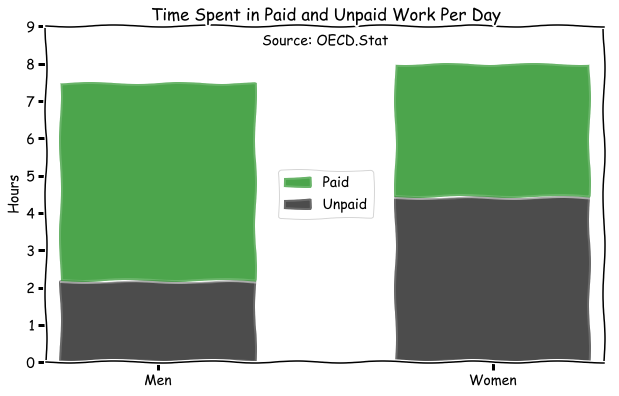

In [188]:
with plt.xkcd():
    
    plt.figure( figsize=(10,6.18) )
    N = 2
    unpaid = ( men_reported.loc['Time spent in unpaid work, by sex'].values[0] , women_reported.loc['Time spent in unpaid work, by sex'].values[0]  )
    paid = ( men_reported.loc['Time spent in paid work, by sex'].values[0], women_reported.loc['Time spent in paid work, by sex'].values[0] )
    ind = [0.2, 0.8]   # the x locations for the groups
    width = 0.35       # the width of the bars: can also be len(x) sequence

    unpaid_plt = plt.bar(ind, unpaid, width, color='k', alpha=0.45)
    paid_plt = plt.bar(ind, paid, width, bottom=unpaid, color='g', alpha=0.45)

    plt.yticks(np.arange(0, 10, 1))
    plt.ylabel('Hours')
    plt.title('Time Spent in Paid and Unpaid Work Per Day')
    plt.xlim([0,1])
    plt.xticks(ind, ('Men', 'Women'))


    plt.legend(( paid_plt[0], unpaid_plt[0]), ('Paid' , 'Unpaid',), loc='center' )
    
    plt.text(
        0.5, 8.5,
        'Source: OECD.Stat',
        ha='center')
    

    plt.show()

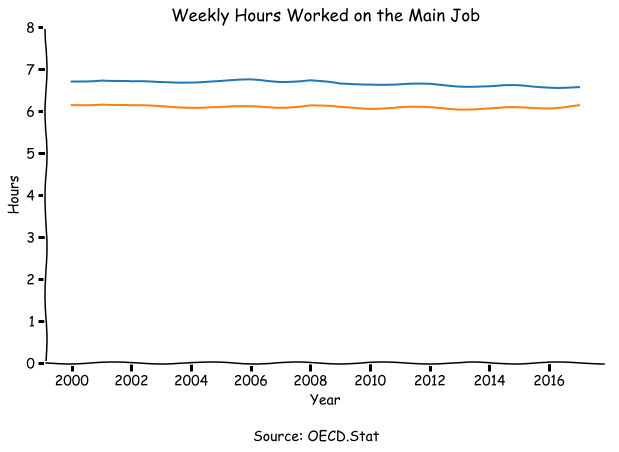

In [144]:
with plt.xkcd():
    # Based on "The Data So Far" from XKCD by Randall Monroe
    # http://xkcd.com/373/

    fig, ax = plt.subplots( figsize=(10, 6.18) )
    
    ax.plot( men_time.index.values, men_time.Value.values/5 )
    ax.plot( women_time.index.values, women_time.Value.values/5 )
    
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.set_ylabel('Hours')
    ax.set_xlabel('Year')
    ax.set_ylim([0,8])
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))


    plt.title("Weekly Hours Worked on the Main Job")

    fig.text(
        0.5, -0.05,
        'Source: OECD.Stat',
        ha='center')
    
    #ax.margin([0.5, 0.5, 0.5, 0.5])

plt.show()